In [1]:
import xarray as xr
import numpy as np
import pandas as pd

### read in raw sst data with pre-processing
deg_sst = xr.open_dataset("../data/deglaciation_climate/LGMR_SST_climo.nc", drop_variables=['lat', 'lon'])
## read in lat/lon
from netCDF4 import Dataset
data = Dataset("../data/deglaciation_climate/LGMR_SST_climo.nc")
sst_lon = data['lon'][0,:]
sst_lat = data['lat'][:,0]
data.close()

## resolve the issue of longitude
deg_sst['lat'] = sst_lat
deg_sst['lon'] = sst_lon
deg_sst = deg_sst.sortby('lon')
deg_sst = deg_sst['sst']

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/var/folders/rq/vks10_qx2l9b08d_pygvwfzh0000gn/T/ipykernel_90107/3403715096.py:10: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  sst_lon = data['lon'][0,:]
/var/folders/rq/vks10_qx2l9b08d_pygvwfzh0000gn/T/ipykernel_90107/3403715096.py:11: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  sst_lat = data['lat'][:,0]


[42.663826 43.562473 64.43824 ]
[134.51375 485.92233 489.83862]
[249.2801  444.71475 625.625  ]
[ 79.58656  187.10373  119.004456]
[ 27.923843 185.39424   60.308247]
[  35.212383 2102.7358   4553.273   ]
[ 23.397417 147.73499   83.61603 ]
[ 30.167738 156.82504  513.0569  ]
[  34.161503  593.3158   1372.2192  ]
[ 38.70567 149.20148 307.27606]
[ 66.94045  87.42525 128.63177]
[ 40.334198 151.08899  170.65938 ]
[ 21.310804 161.55573  177.29558 ]
[ 21.803516 141.73611  149.4212  ]
[ 25.123507  75.430725 301.28284 ]
[ 26.889467  53.733135 152.50958 ]
[ 30.992695  31.461056 134.60298 ]
[ 39.31384  39.83654 238.86285]
[ 41.500248  97.6728   113.35978 ]
[ 40.261772  47.531265 631.14777 ]
[ 43.843998  46.00013  124.98553 ]
[41.014633 41.53873  75.84152 ]
[37.863213 39.10296  95.287155]
[33.64041 49.62695 85.74435]
[ 29.893557  78.12205  452.4281  ]
[  24.603575  152.58492  4058.28    ]
[26.79129 52.4936  67.91322]
[30.45917 40.18895 88.17958]
[ 29.918554  38.224358 100.04694 ]
[ 22.22205   67.95

/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/xarray/coding/variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/rq/vks10_qx2l9b08d_pygvwfzh0000gn/T/ipykernel_90107/1876533046.py:6: RuntimeWarning: Mean of empty slice
  zonal_sst = np.nanmean(deg_sst_atlantic.sel(age=i), axis=1)
/var/folders/rq/vks10_qx2l9b08d_pygvwfzh0000gn/T/ipykernel_90107/1876533046.py:6: RuntimeWarning: Mean of empty slice
  zonal_sst = np.nanmean(deg_sst_atlantic.sel(age=i), axis=1)
/var/folders/rq/vks10_qx2l9b08d_pygvwfzh0000gn/T/ipykernel_90107/1876533046.py:6: RuntimeWarning: Mean of empty slice
  zonal_sst = np.nanmean(deg_sst_atlantic.sel(age=i), axis=1)
/var/folders/rq/vks10_qx2l9b08d_pygvwfzh0000gn/T/ipykernel_90107/1876533046.py:6: RuntimeWarning: Mean of empty slice
  zonal_sst = np.nanmean(deg_sst_atlantic.sel(age=i), axis=1)
/var/folders/rq/vks10_qx2l

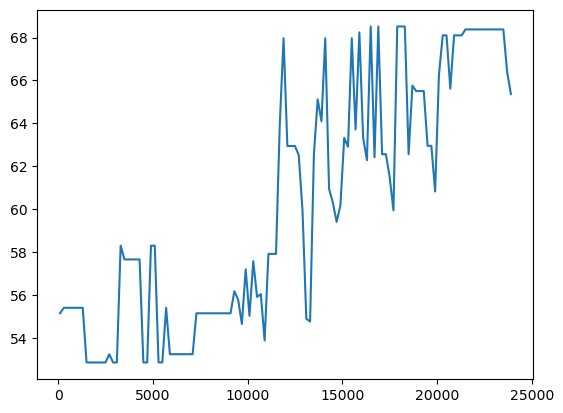

In [2]:
# method 1: the temperature gradient
deg_sst_atlantic=deg_sst.where((deg_sst.lat > 47) & (deg_sst.lat < 90) & (deg_sst.lon > 300) & (deg_sst.lon < 360), drop=True)
x,y=[],[]
for i in deg_sst.age:
    # zonal average, starting from low latitudes
    zonal_sst = np.nanmean(deg_sst_atlantic.sel(age=i), axis=1)
    sst_diff = np.diff(zonal_sst)

    lat=deg_sst_atlantic.lat
    lat_diff = np.diff(lat)

    # get the middle point of age
    lat_mid = pd.Series(lat).rolling(2).mean()[1:]

    # delta temperature per degree
    roc = np.abs(lat_diff/sst_diff)

    N = 3 #top Nth values
    c = np.isnan(roc).sum() # number of nan values
    idx = np.argpartition(roc, -N-c)[-N-c:-c] # index of top Nth values ignoring NA
    print(roc[idx].ravel())
    y.append(np.mean(lat_mid[idx]))
    x.append([i])

import matplotlib.pyplot as plt
plt.plot(x,y)


/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/xarray/coding/variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


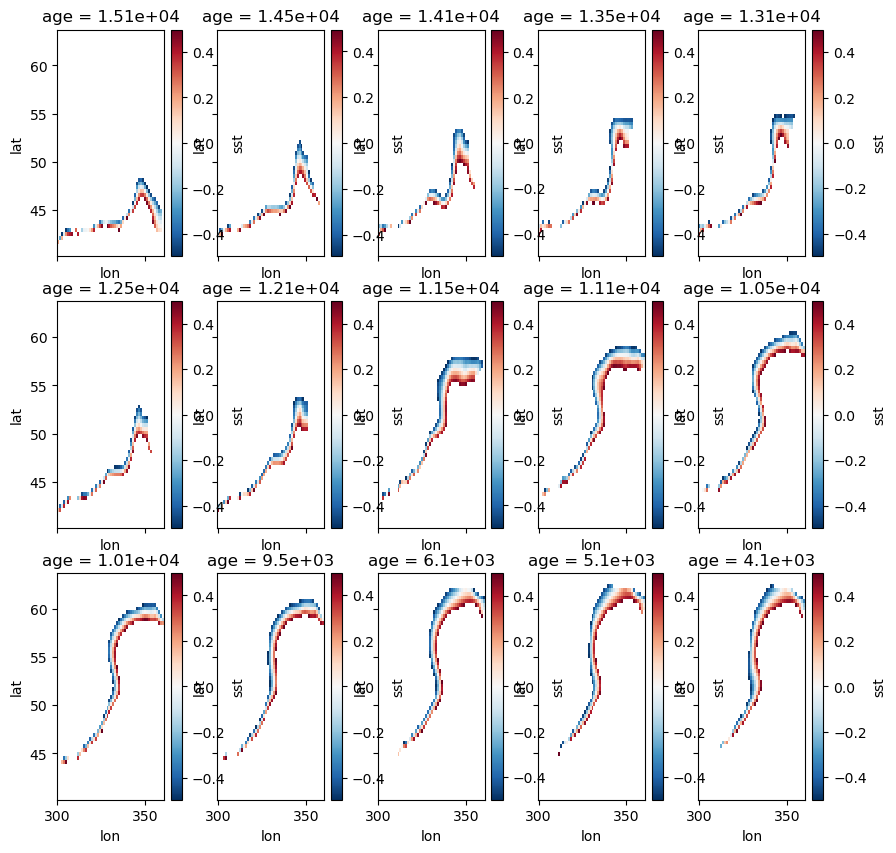

In [3]:
# method 2: the temperature isocline: the temperature at which the temperature is 10C
deg_sst_atlantic=deg_sst.where((deg_sst.lat > 0) & (deg_sst.lat < 90) & (deg_sst.lon > 300) & (deg_sst.lon < 360), drop=True)
deg_sst_diff = deg_sst_atlantic - 10

import matplotlib.pyplot as plt
x =[15000, 14500, 14000,
    13500, 13000, 12500,
    12000, 11500,  11000,
    10500, 10000, 9500,
    6000, 5000, 4000]
fig, ax = plt.subplots(nrows=3, ncols=5,sharex=True, sharey=True, figsize=(10,10))

for i,age in enumerate(x):
    arr = deg_sst_diff.where(np.abs(deg_sst_diff) < .5, drop=True).sel(age=age, method='nearest')
    arr.plot(ax=ax.flat[i])
    #print(np.mean(arr.lat.values))